# Predict Restaurant prices

# Load and take a look at the data

In [86]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [87]:
# Load data
ds=pd.read_csv('Restaurant_Data_Train.csv')
ds_test=pd.read_csv('Restaurant_Data_Test.csv')

In [88]:
ds.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [89]:
ds_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [90]:
ds.shape

(12690, 9)

In [91]:
ds.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

# Check and treat null values

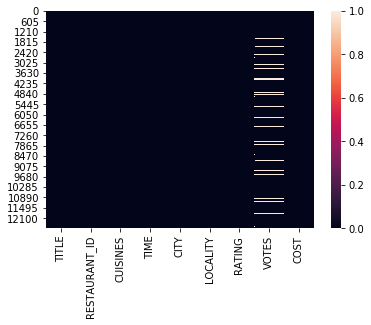

In [92]:
sns.heatmap(ds.isnull())

In [93]:
ds.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [94]:
# count the amounts of given entries in a column
ds['CITY'].value_counts()

Chennai                            2174
Bangalore                          2149
Hyderabad                          1819
Mumbai                             1722
New Delhi                          1321
                                   ... 
Ulsoo                                 1
Naya Nagar Mira Road                  1
Near Ramlila Ground                   1
Bangalore Koramangala 7th Block       1
Gurgaon Haryana                       1
Name: CITY, Length: 359, dtype: int64

No clear city to fill NaN values with, therefore deleting data.

In [95]:
ds = ds[ds['CITY'].notna()]

In [96]:
# count the amounts of given entries in a column
ds['LOCALITY'].value_counts()

Gachibowli            166
Indiranagar           138
Edappally             122
Kakkanad              121
HSR                   120
                     ... 
Secor 38A               1
Sector 71               1
Near India Gate         1
5th A Block             1
Cyber Hills Colony      1
Name: LOCALITY, Length: 1413, dtype: int64

No clear locality to fill NaN values with, therefore deleting data.

In [97]:
ds = ds[ds['LOCALITY'].notna()]

In [98]:
# count the amounts of given entries in a column
ds['RATING'].value_counts()

3.9    1236
3.8    1184
4.0    1092
3.7    1077
3.6     940
4.1     926
3.5     762
4.2     714
NEW     692
3.4     570
4.3     553
-       490
3.3     363
4.4     359
3.2     265
4.5     196
2.9     186
3.1     185
3.0     169
2.8     146
4.6     134
2.7      89
4.7      66
2.6      61
2.5      35
4.8      31
4.9      22
2.4      15
2.3      10
2.1       3
2.0       2
2.2       2
Name: RATING, dtype: int64

In [99]:
ds[['RATING' ]] = ds[['RATING']].apply(pd.to_numeric,errors='coerce')

Replace with mean.

In [ ]:
ds['RATING'].fillna(ds['RATING'].mean(),inplace=True)

In [101]:
ds.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [102]:
ds.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES            1184
COST                0
dtype: int64

In [103]:
# count the amounts of given entries in a column
ds['VOTES'].value_counts()

44 votes      69
38 votes      65
28 votes      65
29 votes      65
35 votes      64
              ..
2425 votes     1
3765 votes     1
6163 votes     1
1743 votes     1
1372 votes     1
Name: VOTES, Length: 1846, dtype: int64

In [104]:
ds['VOTES']= ds['VOTES'].replace(np.nan, 'None', regex=True)

In [105]:
ds.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [106]:
# Remove votes from votes column
ds['VOTES'] = ds['VOTES'].str.replace('votes','')

In [107]:
ds[['VOTES' ]] = ds[['VOTES']].apply(pd.to_numeric,errors='coerce')

In [108]:
ds.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300


# Check correlation

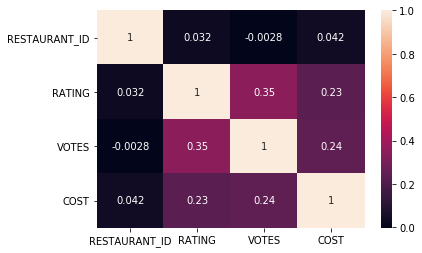

In [109]:
dscor=ds.corr()
sns.heatmap(dscor, annot=True)

# Summary statistics

In [110]:
ds.describe()

,RESTAURANT_ID,RATING,VOTES,COST
count,12577.000000,12577.000000,11393.000000,12577.000000
mean,7758.386738,3.428027,416.997630,656.146219
std,4502.800245,1.175833,845.511189,628.533438
min,0.000000,0.000000,4.000000,20.000000
25%,3865.000000,3.400000,57.000000,300.000000
50%,7735.000000,3.800000,164.000000,500.000000
75%,11683.000000,4.000000,458.000000,800.000000
max,15573.000000,4.900000,41186.000000,14000.000000


# Data visualizations

In [130]:
ds.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

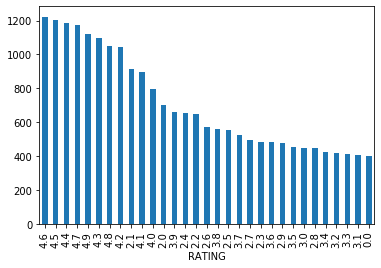

In [131]:
# Show mean cost by ratings
ds.groupby('RATING')['COST'].mean().sort_values(ascending=False).head(51).plot.bar()

Restaurants with higher ratings have higer average cost.

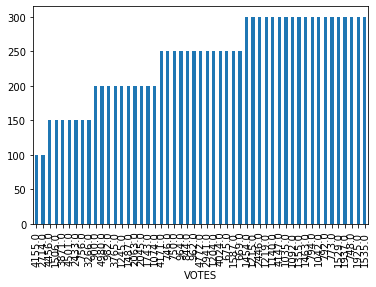

In [133]:
# Show mean cost by ratings
ds.groupby('VOTES')['COST'].mean().sort_values(ascending=True).head(51).plot.bar()

The amount of votes is not necessarily telling in regards to the cost.

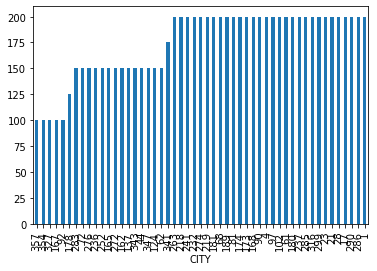

In [134]:
# Show mean cost by city
ds.groupby('CITY')['COST'].mean().sort_values(ascending=True).head(51).plot.bar()

Certain cities have higher costs.

# Encode categorical columns to numeric values

In [112]:
eds=ds

In [113]:
eds.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [114]:
eds.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES            float64
COST               int64
dtype: object

In [115]:
# Change categorical data to numerical data for 2 categoriacl columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY']
for col in cols:
    ds[col] = le.fit_transform(ds[col])

In [116]:
eds.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2604,729,319,285,3.6,49.0,1200
1,33,13198,283,1869,67,1044,4.2,30.0,1500
2,31,10915,2952,651,67,1099,3.8,221.0,800
3,95,6346,4096,273,221,136,4.1,24.0,800
4,50,15387,1749,607,221,620,3.8,165.0,300


# Check correlation after encoding

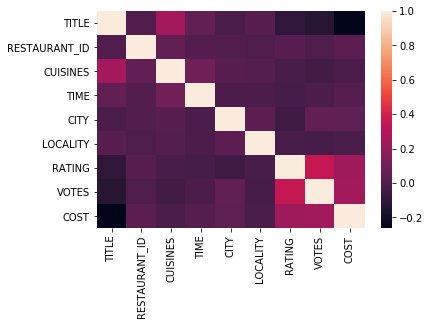

In [117]:
dscor=eds.corr()
sns.heatmap(dscor)

Highest correlation: Votes and Rating
    Next:City, Restaurant ID and Time
        After that: Cuisines and Locality

# Drop irrelevant columns

In [118]:
ds.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [119]:
# Drop irrelevant (poorly correlated) columns - dataset renamed to nds (new dataset)
nds=ds.drop(columns=['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY'])

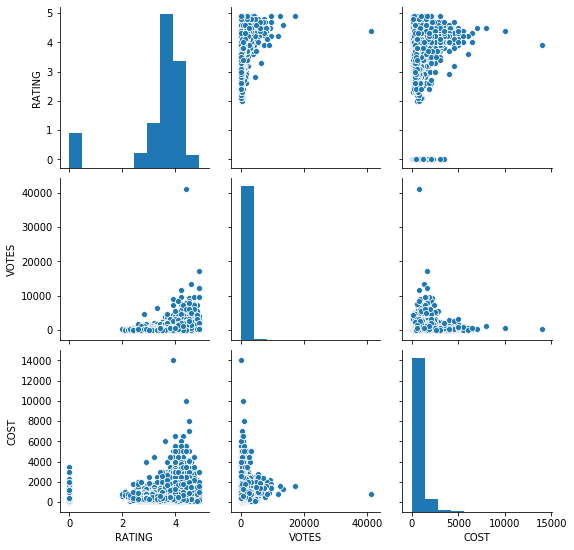

In [120]:
# Checking pairplots
sns.pairplot(nds)
plt.show()

# Find and remove outliers

In [121]:
nds.shape

(12577, 3)

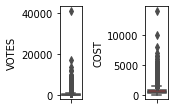

In [122]:
# Show boxplots for all columns, check outliers
collist=nds.columns.values
ncol=3
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(nds[collist[i]], color='red', orient='v')
    plt.tight_layout()

Not removing outliers because it removes all data.

# Check and adjust skewness

In [123]:
# Show skewness (less than 0.55 is ok)
nds.skew()

RATING    -2.223762
VOTES     14.136185
COST       3.974891
dtype: float64

# Split data into x and y

In [124]:
nds.columns

Index(['RATING', 'VOTES', 'COST'], dtype='object')

In [125]:
# Lineup target and input values
nds_x=nds.drop(columns=['COST'])
y=nds[['COST']]

# Apply scaler

# Train-Test split

In [126]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(nds_x,y, random_state=55, test_size=0.20)

# Model

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.externals import joblib
from sklearn import linear_model

In [129]:
# Error calculation
max_r_score=0
for r_state in range(42,100):
    x_train,x_test, y_train, y_test = train_test_split(nds_x,y, random_state=r_state, test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("Max r2 score for",final_r_state,"is", max_r_score)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Crossvalidation
cross_val_score(linear_model.LinearRegression(),nds_x,y,cv=10,scoring='r2').mean()

In [ ]:
# R2 score gives us a rondom state of 88
x_train,x_test, y_train, y_test = train_test_split(nds_x,y, random_state=88, test_size=0.20)
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [ ]:
# R2 and Mean squared error statements
print('r score is: ',r2_score(y_test,y_pred))
print('RMSE is: ', np.sqrt(mean_squared_error(y_test, y_pred)))

# Other regression models

In [ ]:
# Loop for SVR types
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
# Prepare a range of alpha values to test
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
# Create and fit a Ridge regression model to test each alpha
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x_train,y_train)

#Summarize the results of the grid search

print(grid.best_estimator_.alpha)

In [ ]:
# Create and fit a Ridge regression model to test each alpha
model2=Lasso()
grid=GridSearchCV(estimator=model2,param_grid=alphavalue)
grid.fit(x_train,y_train)

#Summarize the results of the grid search

print(grid.best_estimator_.alpha)

In [ ]:
# x_train,x_test,y_train, y_test
# Try to minimize the coefficient variance

rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

In [ ]:
# Cross validation score for Ridge Regressor
cross_val_score(linear_model.Ridge(alpha=1),x,y,cv=10,scoring='r2').mean()

In [ ]:
# x_train,x_test,y_train, y_test
# Try to minimize the coefficient variance

las=Lasso(alpha=0.001)
las.fit(x_train,y_train)
las.score(x_train,y_train)

In [ ]:
# Use Gradient Boosting technique with GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters, cv=5)
clf.fit(x,y)
clf.best_params_

In [ ]:
# Use CrossValScore with Gradient Boosting to check r2 mean and standard deviation
print('Mean r2 score for GradientBoosting Regression:', cross_val_score(gbr,df_x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for GradientBoosting Regression:',cross_val_score(gbr,df_x,y,cv=5,scoring='r2').std())

In [ ]:
# Use AdaBoost Regression technique with GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_r=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_r,parameters, cv=5)
clf.fit(df_x,y)
clf.best_params_

In [ ]:
ada_r=AdaBoostRegressor(base_estimator=lsreg,learning_rate=0.001,n_estimators=10)
print('Mean r2 score for AdaBoost Regression:', cross_val_score(ada_r,df_x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for AdaBoost Regression:',cross_val_score(ada_r,df_x,y,cv=5,scoring='r2').std())

In [ ]:
# Use GridSreachCV to find the optimal value of n_neighnors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors': range(1,30)}
knr=KNeigborsRegressor()
gknr=GridSearchCV(knr,neighbors, cv=10)
gknr.fit(df_x,y)
gknr.best_params_

In [ ]:
# Use KNN Regression to check max r2 score corresponding to different random states
knr=KneighborsRegressor(n_neighbors=19)
r_state=maxr2_score(knr,df_x,y)

I choose the LinearRegression model because it has the best score

r score is:  99.98
RMSE is:  18.7
Cross_val is: 99.9

# Save the model

In [ ]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(regr,'US_Covid_deaths.pkl')

In [ ]:
# Load and use model to make a prediction
model=joblib.load('US_Covid_deaths.pkl')
model.predict(x_test)